In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv('../datos/originales/mexico_exportaciones.csv')
df = df.drop(['Partida Aduanera', 'Descripcion Partida Aduanera', 'DUA','Ciudad Importador', 'Dirección Importador', 'Dirección Exportador', 'Ciudad Exportador', 'Estado Exportador', 'Regimen'], axis=1)
df['Year'] = pd.to_datetime(df['Fecha'], dayfirst=True).dt.year
df['Date'] = pd.to_datetime(df['Fecha'], dayfirst=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Aduana                 578 non-null    object        
 1   Fecha                  578 non-null    object        
 2   Cod. Tributario        578 non-null    object        
 3   Exportador             578 non-null    object        
 4   Importador             409 non-null    object        
 5   Qty 1                  578 non-null    float64       
 6   Unid 1                 578 non-null    object        
 7   Qty 2                  578 non-null    float64       
 8   Unid 2                 578 non-null    object        
 9   U$ FOB Tot             578 non-null    float64       
 10  U$ FOB Unit 1          578 non-null    float64       
 11  U$ FOB Unit 2          578 non-null    float64       
 12  País Destino           578 non-null    object        
 13  Vía  

                                           Exportador      Qty 1
3                        ALFONSO AARON PRECIADO PEREZ  103740.00
65  SOC COOP DE PRODUCCION PESQUERA LA LIBERTAD ED...   57124.18
68  SOCIEDAD COOPERATIVA DE PRODUCCION PESQUERA SE...   43081.55
5                     B I INTERNACIONAL S DE RL DE CV   41295.79
17       CORPORATIVO PESQUERO VELAZQUEZ, S.A. DE C.V.   38440.00
4     AVANCES TECNOLOGICOS EN FERTILIDAD S.A. DE C.V.   36535.00
73       TRANSAMERICA INTL GROUP MEXICO S DE RL DE CV   34145.00
15                            CONRADO ANGULO MELENDEZ   28292.50
41                            MARE CUCUMERIS SA DE CV   22900.00
21         EXPORTADORA CAMPECHE STARFISH S.A. DE C.V.   22150.00
29                                   HUL KIN SA DE CV   21819.00
39                        LUIS GUSTAVO REYES CORRALES   19138.00
56                PRODUCTOS MARITIMOS CHIMEX SA DE CV   16585.00
43                                    MARSEL S DE R L   16084.00
58                 RED CA

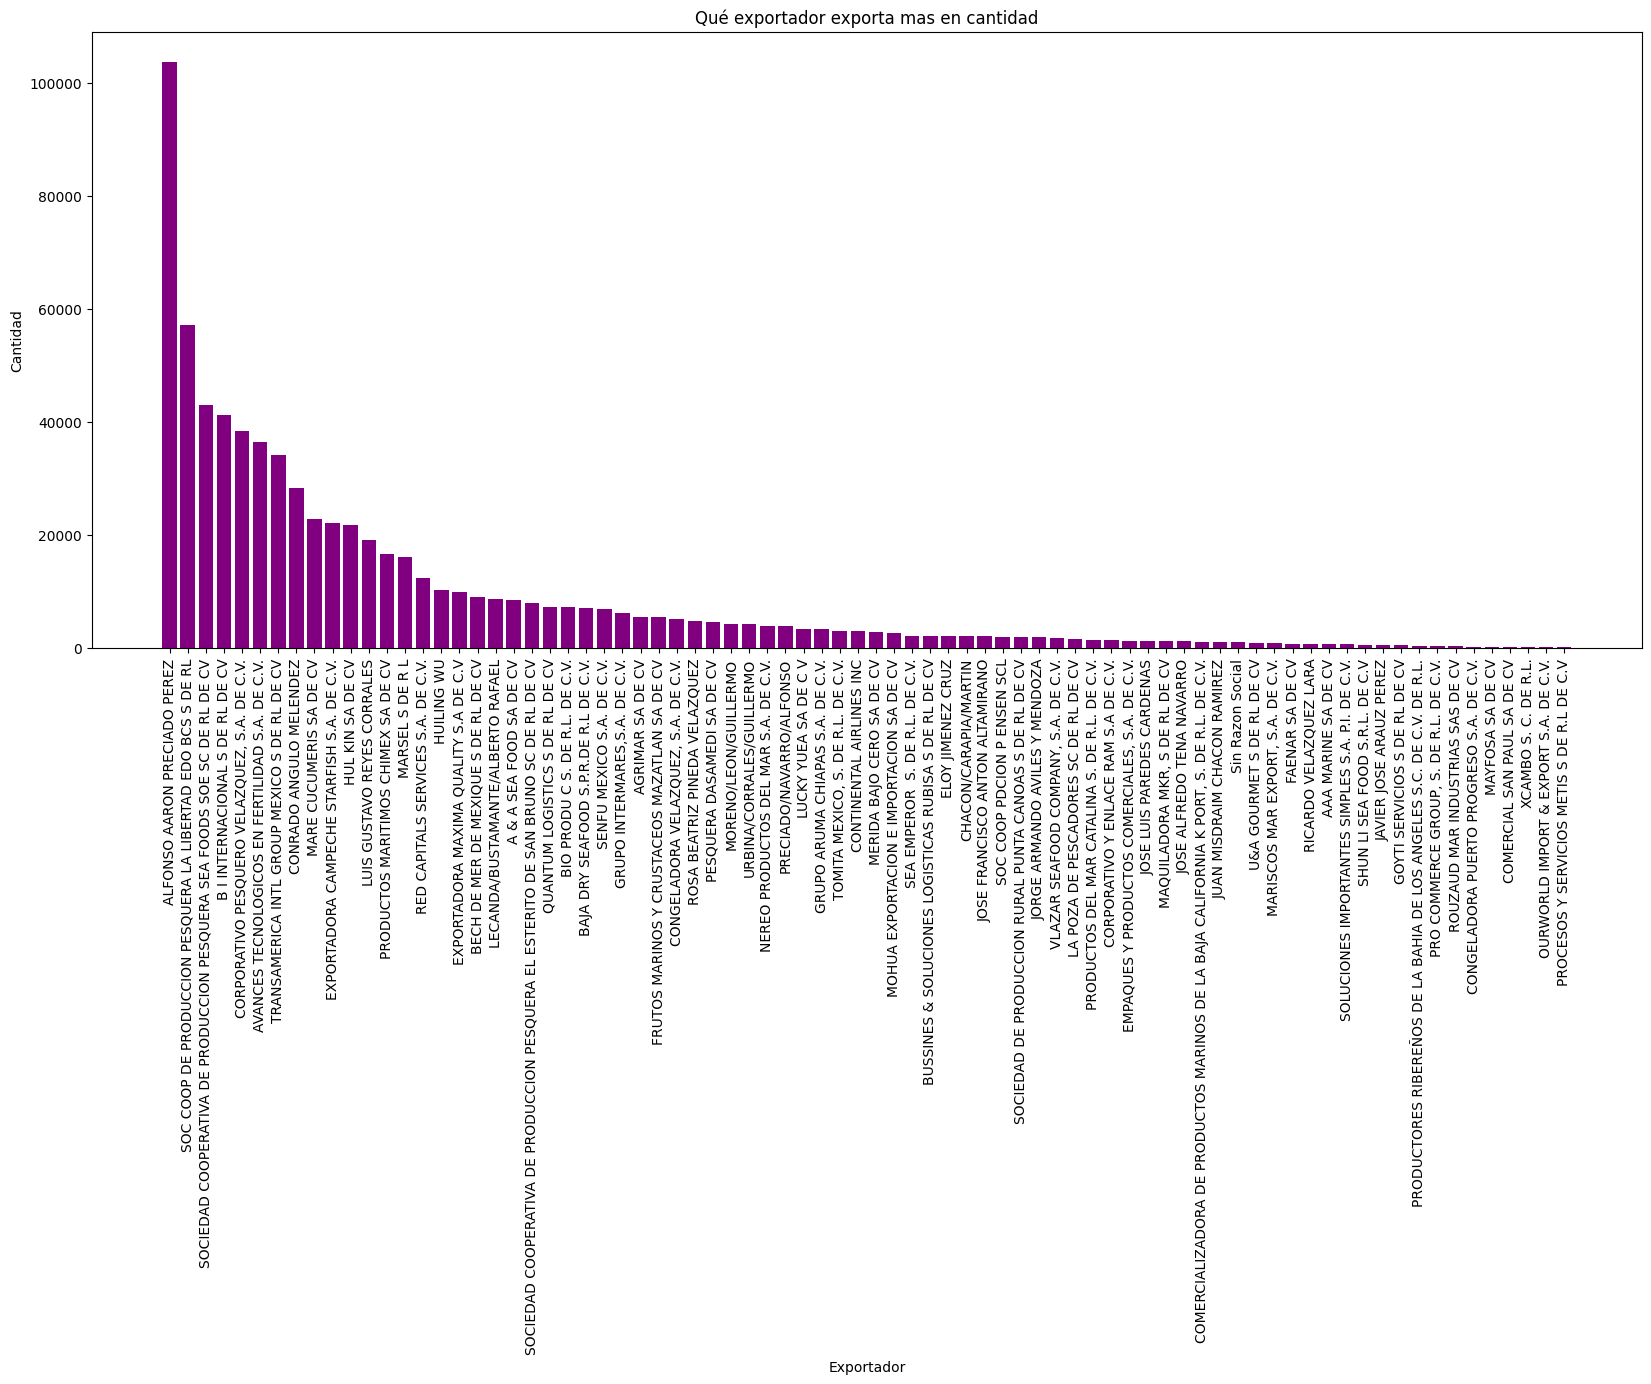

In [2]:
sum_by_exportador = df.groupby('Exportador')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(sum_by_exportador.head(20))

plt.figure(figsize = (20,8))

plt.bar(sum_by_exportador['Exportador'], sum_by_exportador['Qty 1'], color='purple')
plt.xlabel("Exportador")
plt.ylabel("Cantidad")
plt.title("Qué exportador exporta mas en cantidad")
plt.xticks(rotation=90)
plt.show()

                                           Exportador  U$ FOB Tot
17       CORPORATIVO PESQUERO VELAZQUEZ, S.A. DE C.V.  2398345.93
68  SOCIEDAD COOPERATIVA DE PRODUCCION PESQUERA SE...  1887341.41
65  SOC COOP DE PRODUCCION PESQUERA LA LIBERTAD ED...   789880.00
27                      GRUPO INTERMARES,S.A. DE C.V.   786898.38
6               BAJA DRY SEAFOOD S.P.R.DE R.L DE C.V.   755824.30
41                            MARE CUCUMERIS SA DE CV   713250.00
21         EXPORTADORA CAMPECHE STARFISH S.A. DE C.V.   687900.00
2                                    AGRIMAR SA DE CV   668556.16
29                                   HUL KIN SA DE CV   662785.00
5                     B I INTERNACIONAL S DE RL DE CV   570369.34
73       TRANSAMERICA INTL GROUP MEXICO S DE RL DE CV   533247.47
63                          SENFU MEXICO S.A. DE C.V.   372540.15
14                CONGELADORA VELAZQUEZ, S.A. DE C.V.   368400.01
67  SOCIEDAD COOPERATIVA DE PRODUCCION PESQUERA EL...   361008.69
47        

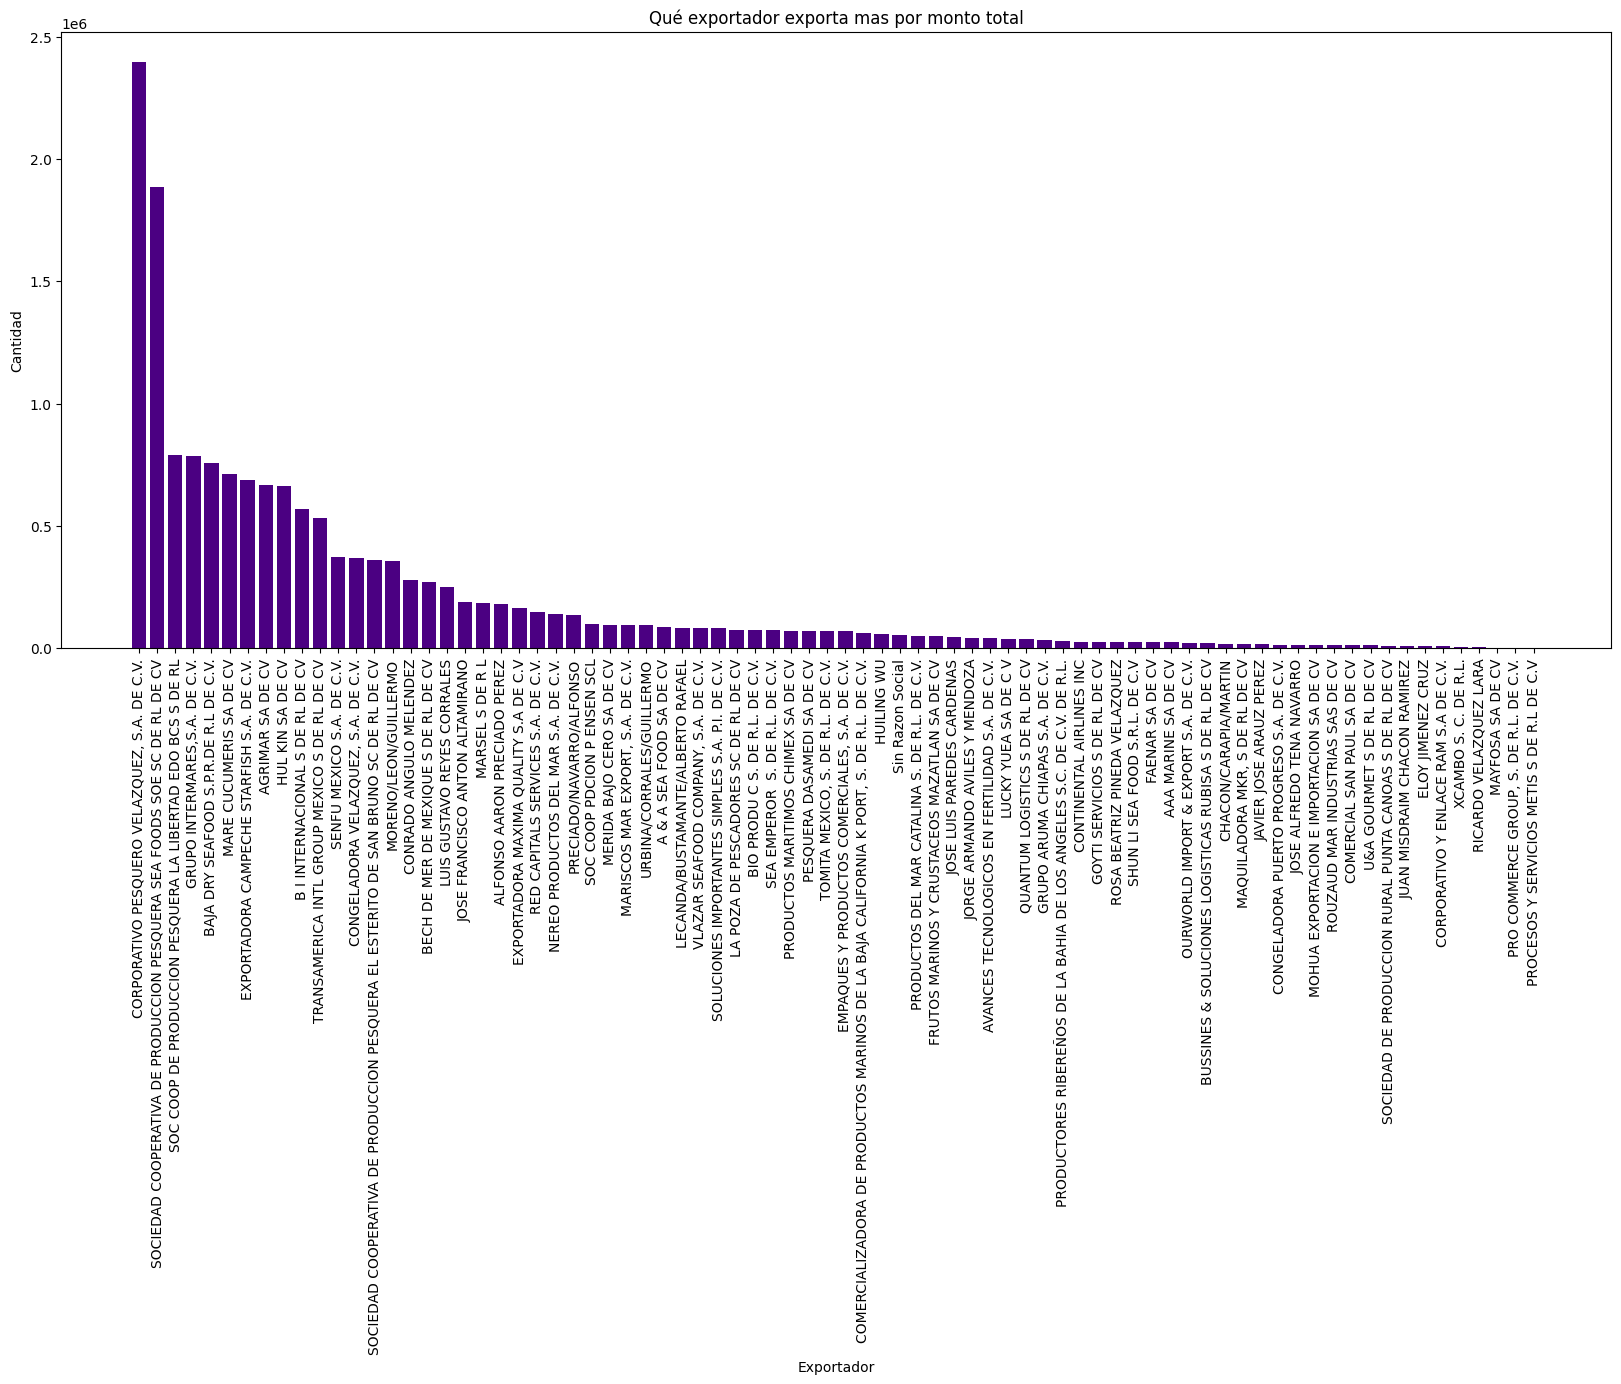

In [3]:
sum_by_exportador = df.groupby('Exportador')['U$ FOB Tot'].sum().reset_index().sort_values(by='U$ FOB Tot', ascending=False)
print(sum_by_exportador.head(21))

plt.figure(figsize = (20,8))

plt.bar(sum_by_exportador['Exportador'], sum_by_exportador['U$ FOB Tot'], color='indigo')
plt.xlabel("Exportador")
plt.ylabel("Cantidad")
plt.title("Qué exportador exporta mas por monto total")
plt.xticks(rotation=90)
plt.show()

(196, 17)
                                           Exportador     Qty 1
33  SOC COOP DE PRODUCCION PESQUERA LA LIBERTAD ED...  43755.10
7        CORPORATIVO PESQUERO VELAZQUEZ, S.A. DE C.V.  38440.00
35  SOCIEDAD COOPERATIVA DE PRODUCCION PESQUERA SE...  22459.00
8          EXPORTADORA CAMPECHE STARFISH S.A. DE C.V.  22150.00
3     AVANCES TECNOLOGICOS EN FERTILIDAD S.A. DE C.V.  15800.00
27                 RED CAPITALS SERVICES S.A. DE C.V.  12480.00
6                             CONRADO ANGULO MELENDEZ  11138.00
26                    QUANTUM LOGISTICS S DE RL DE CV   7336.00
18                        LUIS GUSTAVO REYES CORRALES   7129.00
12                                         HUILING WU   6472.00
10      FRUTOS MARINOS Y CRUSTACEOS MAZATLAN SA DE CV   5495.00
5                 CONGELADORA VELAZQUEZ, S.A. DE C.V.   5180.00
29                      ROSA BEATRIZ PINEDA VELAZQUEZ   4900.00
32                          SENFU MEXICO S.A. DE C.V.   4657.20
23                         PES

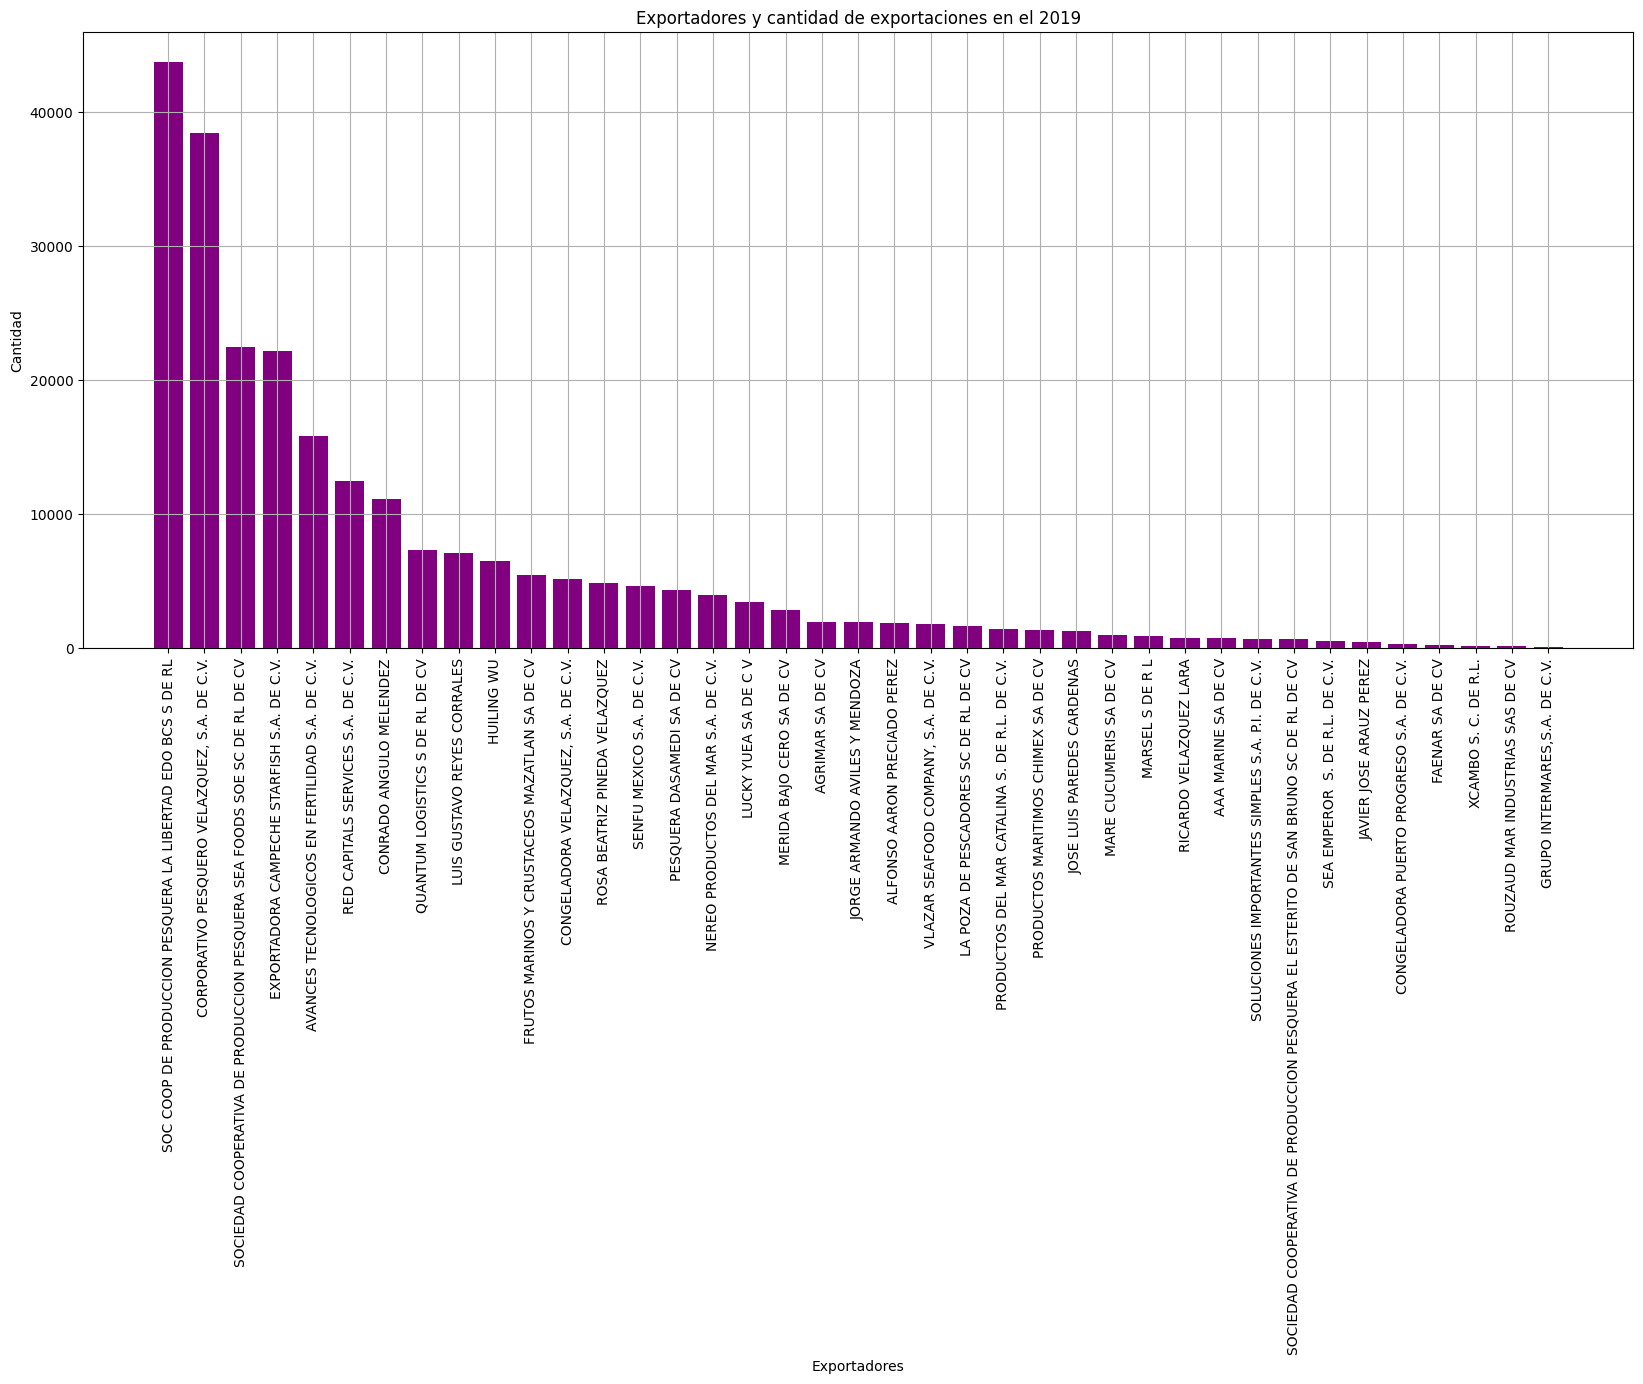

In [4]:
filtered_df_2019 = df.loc[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2019-12-31')]
print(filtered_df_2019.shape)

exportadores_2019 = filtered_df_2019.groupby('Exportador')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(exportadores_2019.head(50))

plt.figure(figsize = (20,8))

plt.bar(exportadores_2019['Exportador'], exportadores_2019['Qty 1'], color='purple')
plt.xlabel("Exportadores")
plt.ylabel("Cantidad")
plt.title("Exportadores y cantidad de exportaciones en el 2019")
plt.xticks(rotation=90)

plt.grid()
plt.show()

(97, 17)
                                           Exportador     Qty 1
2                     B I INTERNACIONAL S DE RL DE CV  32502.00
13                                   HUL KIN SA DE CV  21819.00
1     AVANCES TECNOLOGICOS EN FERTILIDAD S.A. DE C.V.  20735.00
19  SOC COOP DE PRODUCCION PESQUERA LA LIBERTAD ED...  11407.08
10              EXPORTADORA MAXIMA QUALITY S.A DE C.V  10001.08
3                BECH DE MER DE MEXIQUE S DE RL DE CV   9000.00
15                                    MARSEL S DE R L   8850.00
0                             A & A SEA FOOD SA DE CV   8499.00
4                      BIO PRODU C S. DE R.L. DE C.V.   7244.24
7                             CONRADO ANGULO MELENDEZ   4349.50
16                              MORENO/LEON/GUILLERMO   3762.00
23                  TOMITA MEXICO, S. DE R.L. DE C.V.   3072.00
8                            CONTINENTAL AIRLINES INC   3000.00
5   BUSSINES & SOLUCIONES LOGISTICAS RUBISA S DE R...   2188.00
20  SOCIEDAD COOPERATIVA DE PRO

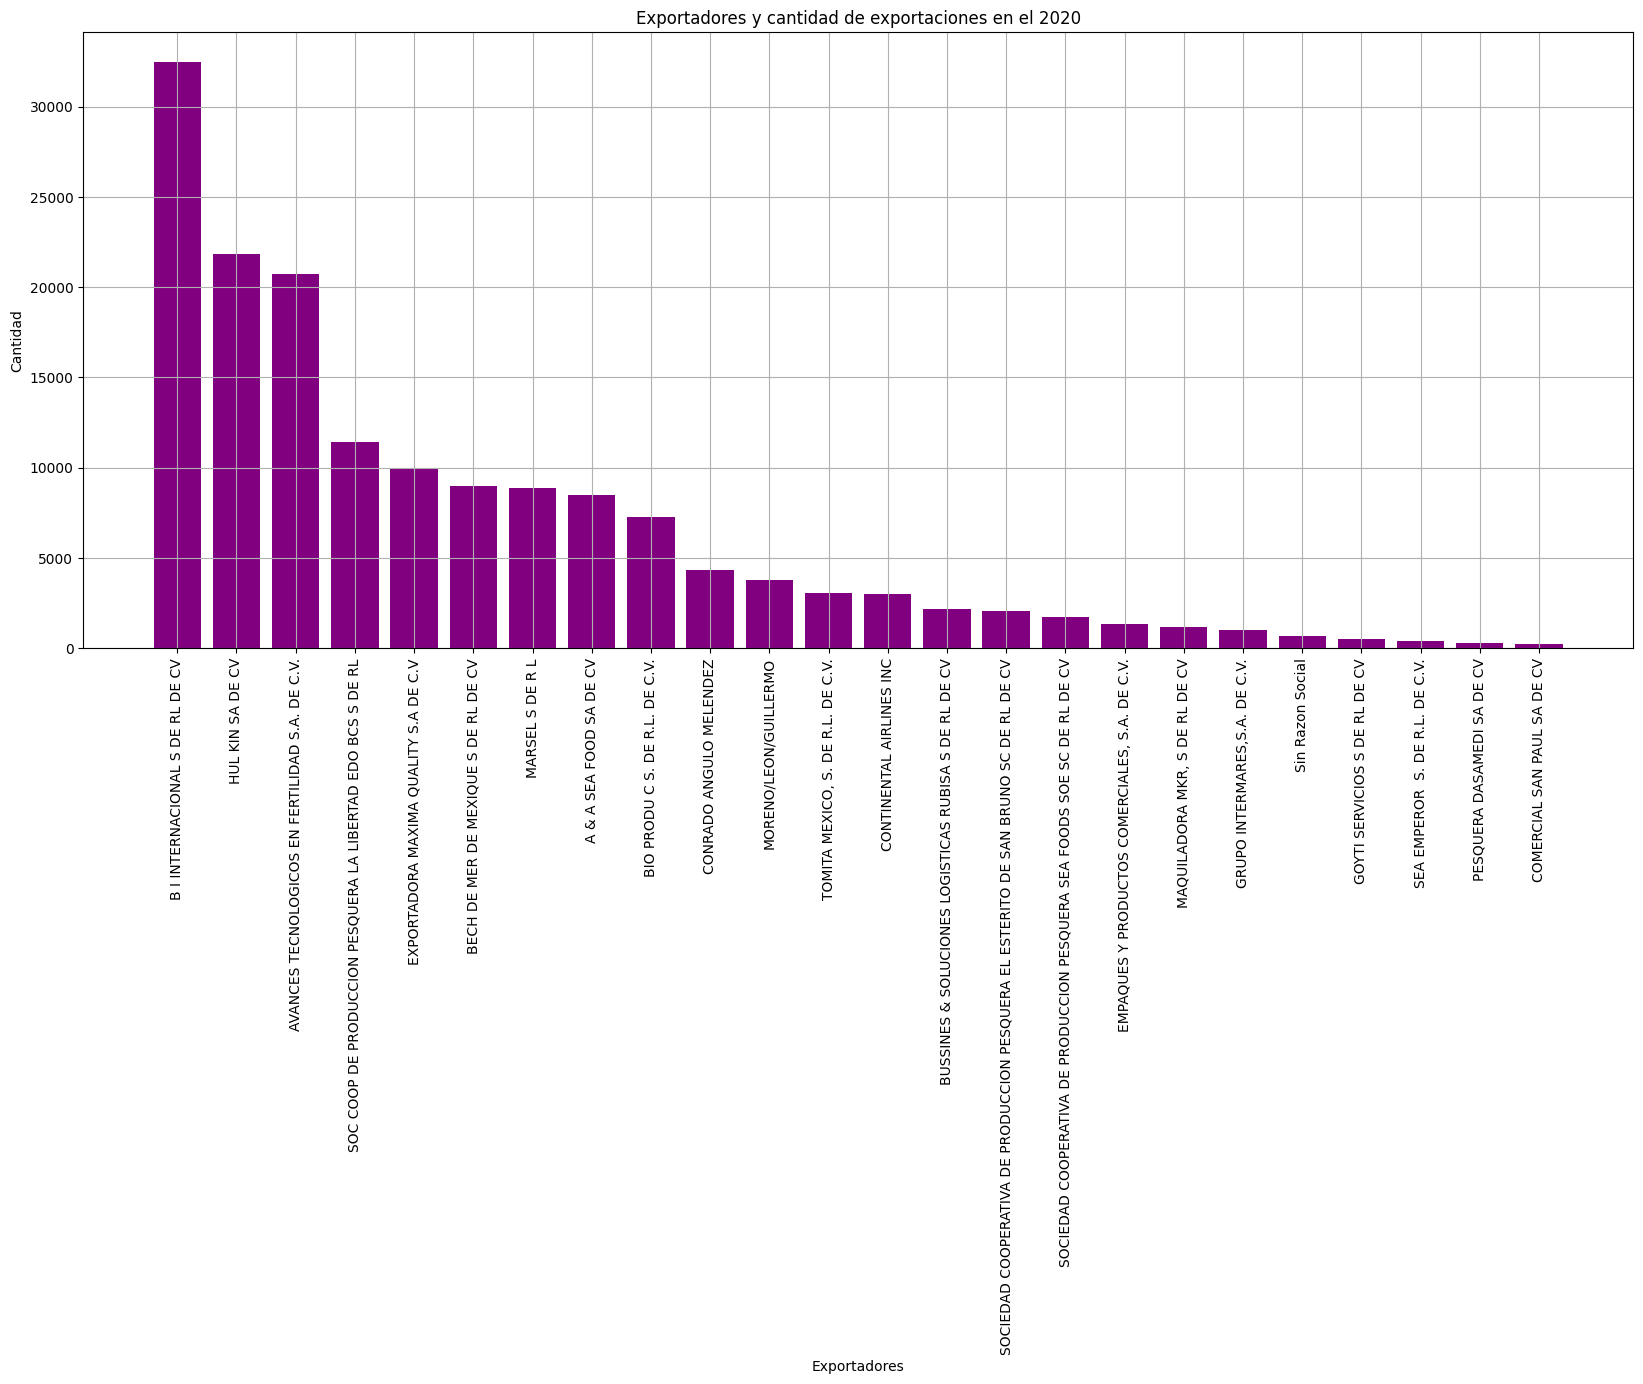

In [6]:
filtered_df_2020 = df.loc[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2020-12-31')]
print(filtered_df_2020.shape)

exportadores_2020 = filtered_df_2020.groupby('Exportador')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(exportadores_2020)

plt.figure(figsize = (20,8))

plt.bar(exportadores_2020['Exportador'], exportadores_2020['Qty 1'], color='purple')
plt.xlabel("Exportadores")
plt.ylabel("Cantidad")
plt.title("Exportadores y cantidad de exportaciones en el 2020")
plt.xticks(rotation=90)

plt.grid()
plt.show()

(109, 17)
                                           Exportador     Qty 1
15                            MARE CUCUMERIS SA DE CV  18905.00
5                             CONRADO ANGULO MELENDEZ  12205.00
14                        LUIS GUSTAVO REYES CORRALES  10809.00
13                  LECANDA/BUSTAMANTE/ALBERTO RAFAEL   8695.00
16                                    MARSEL S DE R L   6314.00
28                          URBINA/CORRALES/GUILLERMO   4275.00
1                        ALFONSO AARON PRECIADO PEREZ   4013.00
9                                          HUILING WU   2692.00
17           MOHUA EXPORTACION E IMPORTACION SA DE CV   2655.00
27       TRANSAMERICA INTL GROUP MEXICO S DE RL DE CV   2080.00
23  SOC COOP DE PRODUCCION PESQUERA LA LIBERTAD ED...   1962.00
8                       GRUPO INTERMARES,S.A. DE C.V.   1618.23
11                    JOSE FRANCISCO ANTON ALTAMIRANO   1603.85
6                CORPORATIVO Y ENLACE RAM S.A DE C.V.   1430.00
21                    SEA EMPE

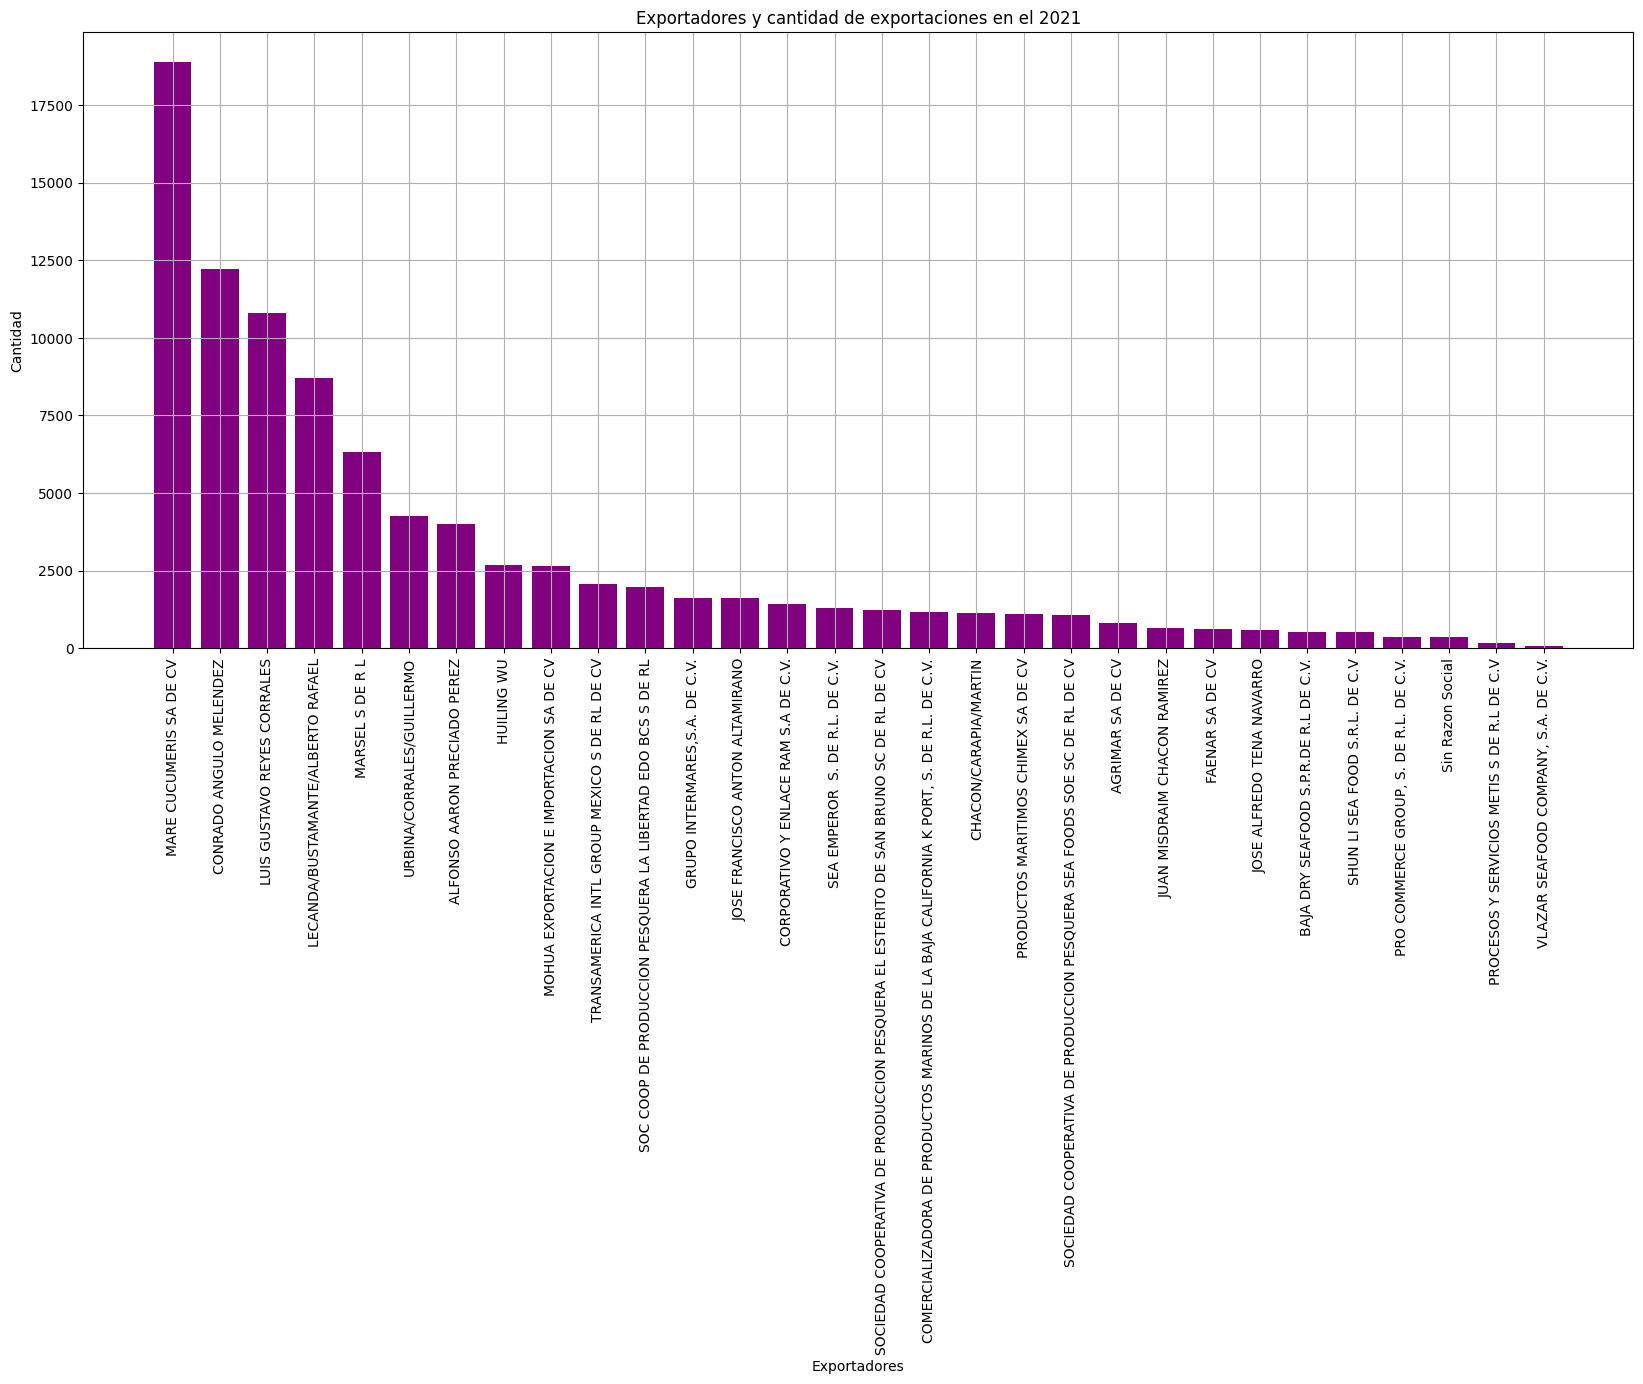

In [8]:
filtered_df_2021 = df.loc[(df['Date'] >= '2021-01-01') & (df['Date'] <= '2021-12-31')]
print(filtered_df_2021.shape)

exportadores_2021 = filtered_df_2021.groupby('Exportador')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(exportadores_2021)

plt.figure(figsize = (20,8))

plt.bar(exportadores_2021['Exportador'], exportadores_2021['Qty 1'], color='purple')
plt.xlabel("Exportadores")
plt.ylabel("Cantidad")
plt.title("Exportadores y cantidad de exportaciones en el 2021")
plt.xticks(rotation=90)

plt.grid()
plt.show()

(66, 17)
                                           Exportador     Qty 1
1                        ALFONSO AARON PRECIADO PEREZ  97817.00
16                PRODUCTOS MARITIMOS CHIMEX SA DE CV  11250.00
2                     B I INTERNACIONAL S DE RL DE CV   5569.88
3               BAJA DRY SEAFOOD S.P.R.DE R.L DE C.V.   3930.00
19  SOCIEDAD COOPERATIVA DE PRODUCCION PESQUERA EL...   3575.00
11                            MARE CUCUMERIS SA DE CV   2990.00
18                          SENFU MEXICO S.A. DE C.V.   2294.00
20  SOCIEDAD DE PRODUCCION RURAL PUNTA CANOAS S DE...   1947.00
14                           PRECIADO/NAVARRO/ALFONSO   1008.00
6                       GRUPO INTERMARES,S.A. DE C.V.    817.92
10                        LUIS GUSTAVO REYES CORRALES    692.00
7                           JOSE ALFREDO TENA NAVARRO    610.00
5                             CONRADO ANGULO MELENDEZ    600.00
4                               CHACON/CARAPIA/MARTIN    450.00
9                        JUAN M

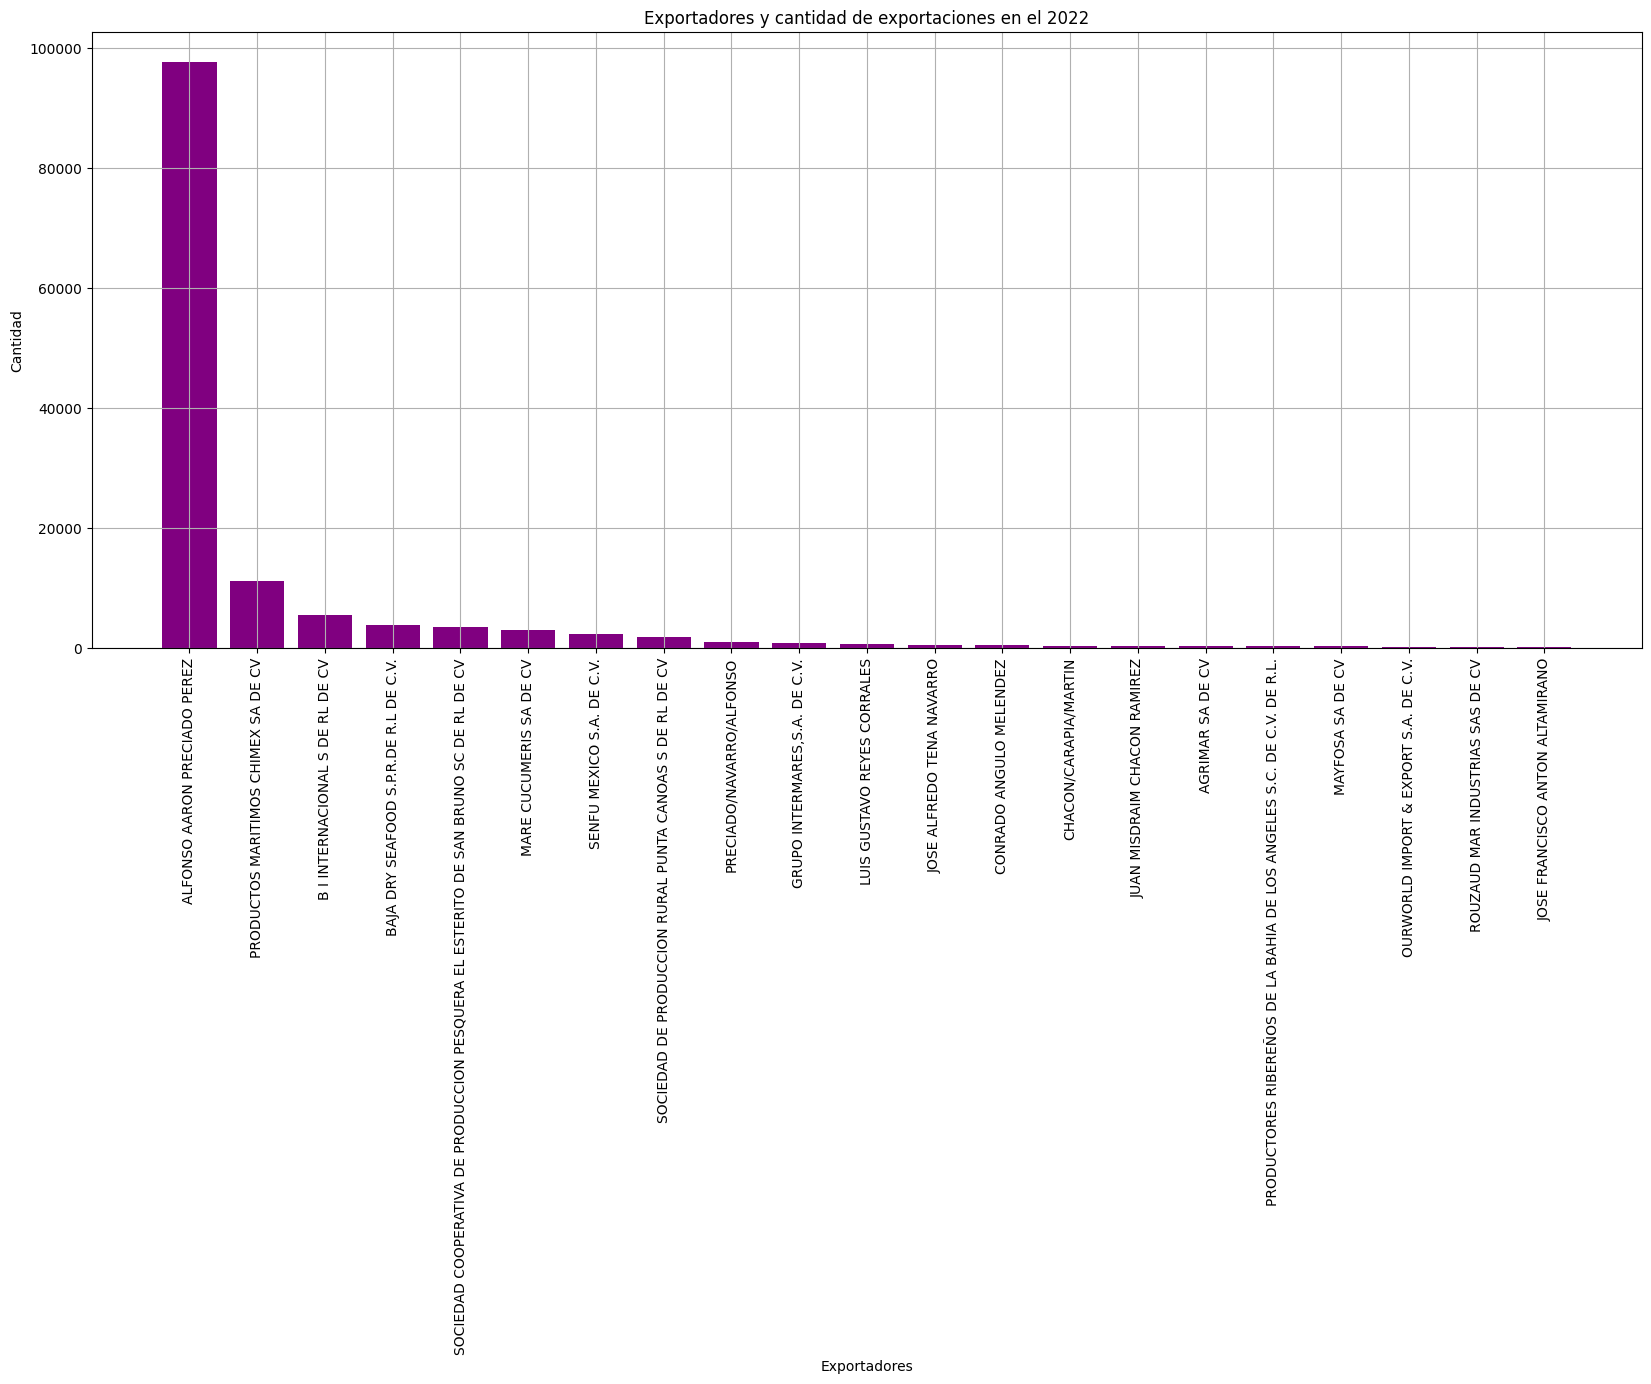

In [9]:
filtered_df_2022 = df.loc[(df['Date'] >= '2022-01-01') & (df['Date'] <= '2022-12-31')]
print(filtered_df_2022.shape)

exportadores_2022 = filtered_df_2022.groupby('Exportador')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(exportadores_2022)

plt.figure(figsize = (20,8))

plt.bar(exportadores_2022['Exportador'], exportadores_2022['Qty 1'], color='purple')
plt.xlabel("Exportadores")
plt.ylabel("Cantidad")
plt.title("Exportadores y cantidad de exportaciones en el 2022")
plt.xticks(rotation=90)

plt.grid()
plt.show()

(65, 17)
                                           Exportador     Qty 1
16       TRANSAMERICA INTL GROUP MEXICO S DE RL DE CV  23485.00
14  SOCIEDAD COOPERATIVA DE PRODUCCION PESQUERA SE...  14890.00
5                    GRUPO ARUMA CHIAPAS S.A. DE C.V.   3350.00
9                            PRECIADO/NAVARRO/ALFONSO   2876.00
11                PRODUCTOS MARITIMOS CHIMEX SA DE CV   2875.00
2               BAJA DRY SEAFOOD S.P.R.DE R.L DE C.V.   2216.00
4                                   ELOY JIMENEZ CRUZ   2040.00
12                        SOC COOP PDCION P ENSEN SCL   1977.00
1                     B I INTERNACIONAL S DE RL DE CV   1796.78
6                       GRUPO INTERMARES,S.A. DE C.V.   1287.07
17                          U&A GOURMET S DE RL DE CV   1000.00
0                                    AGRIMAR SA DE CV    659.64
8                               MORENO/LEON/GUILLERMO    525.00
7                         LUIS GUSTAVO REYES CORRALES    508.00
3                              

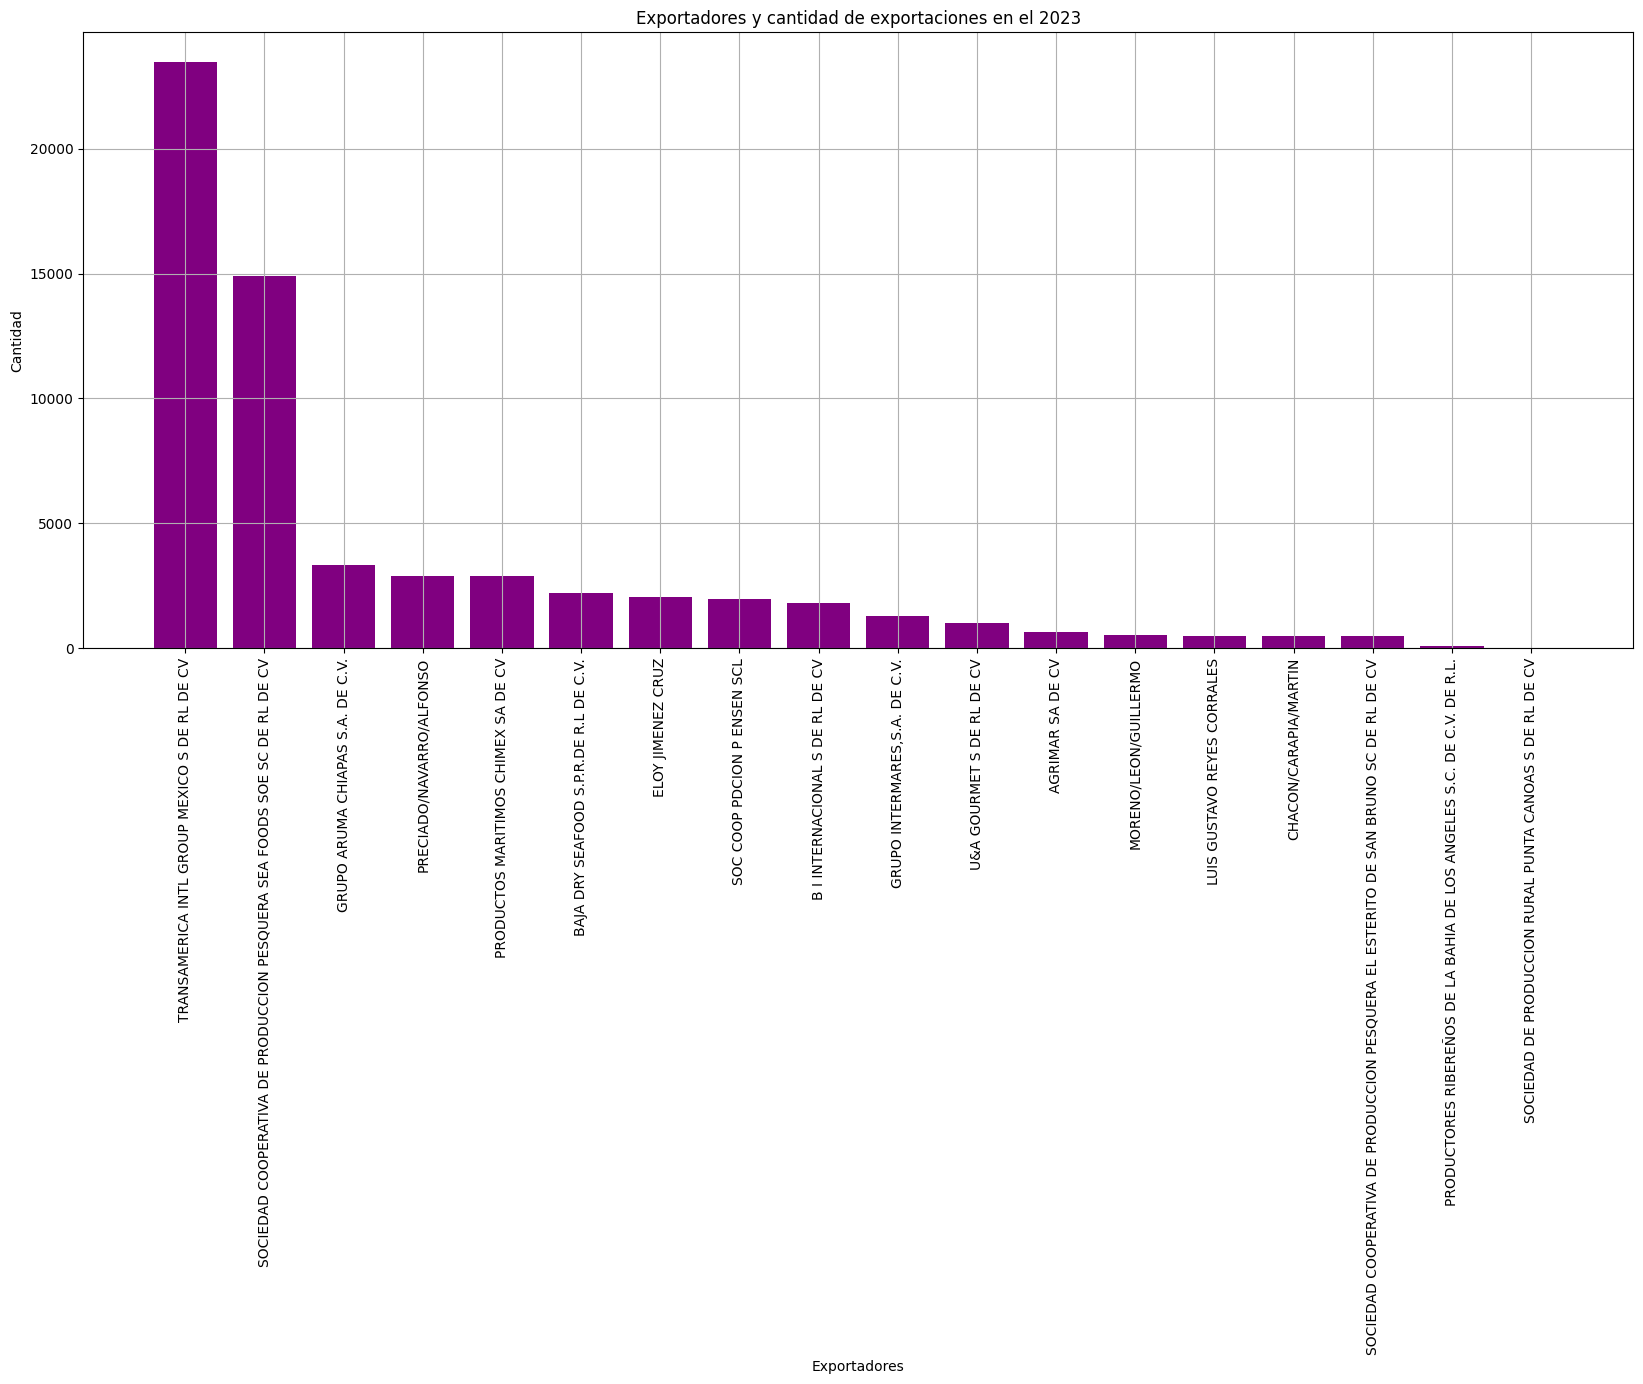

In [10]:
filtered_df_2023 = df.loc[(df['Date'] >= '2023-01-01') & (df['Date'] <= '2023-12-31')]
print(filtered_df_2023.shape)

exportadores_2023 = filtered_df_2023.groupby('Exportador')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(exportadores_2023)

plt.figure(figsize = (20,8))

plt.bar(exportadores_2023['Exportador'], exportadores_2023['Qty 1'], color='purple')
plt.xlabel("Exportadores")
plt.ylabel("Cantidad")
plt.title("Exportadores y cantidad de exportaciones en el 2023")
plt.xticks(rotation=90)

plt.grid()
plt.show()

(45, 17)
                                          Exportador    Qty 1
9       TRANSAMERICA INTL GROUP MEXICO S DE RL DE CV  8580.00
8  SOCIEDAD COOPERATIVA DE PRODUCCION PESQUERA SE...  2925.00
0                                   AGRIMAR SA DE CV  1654.55
1                    B I INTERNACIONAL S DE RL DE CV  1427.13
4                      GRUPO INTERMARES,S.A. DE C.V.  1383.89
5                                         HUILING WU  1200.00
7                  MARISCOS MAR EXPORT, S.A. DE C.V.   958.00
2              BAJA DRY SEAFOOD S.P.R.DE R.L DE C.V.   409.50
6                    JOSE FRANCISCO ANTON ALTAMIRANO   331.55
3                                  ELOY JIMENEZ CRUZ    62.00


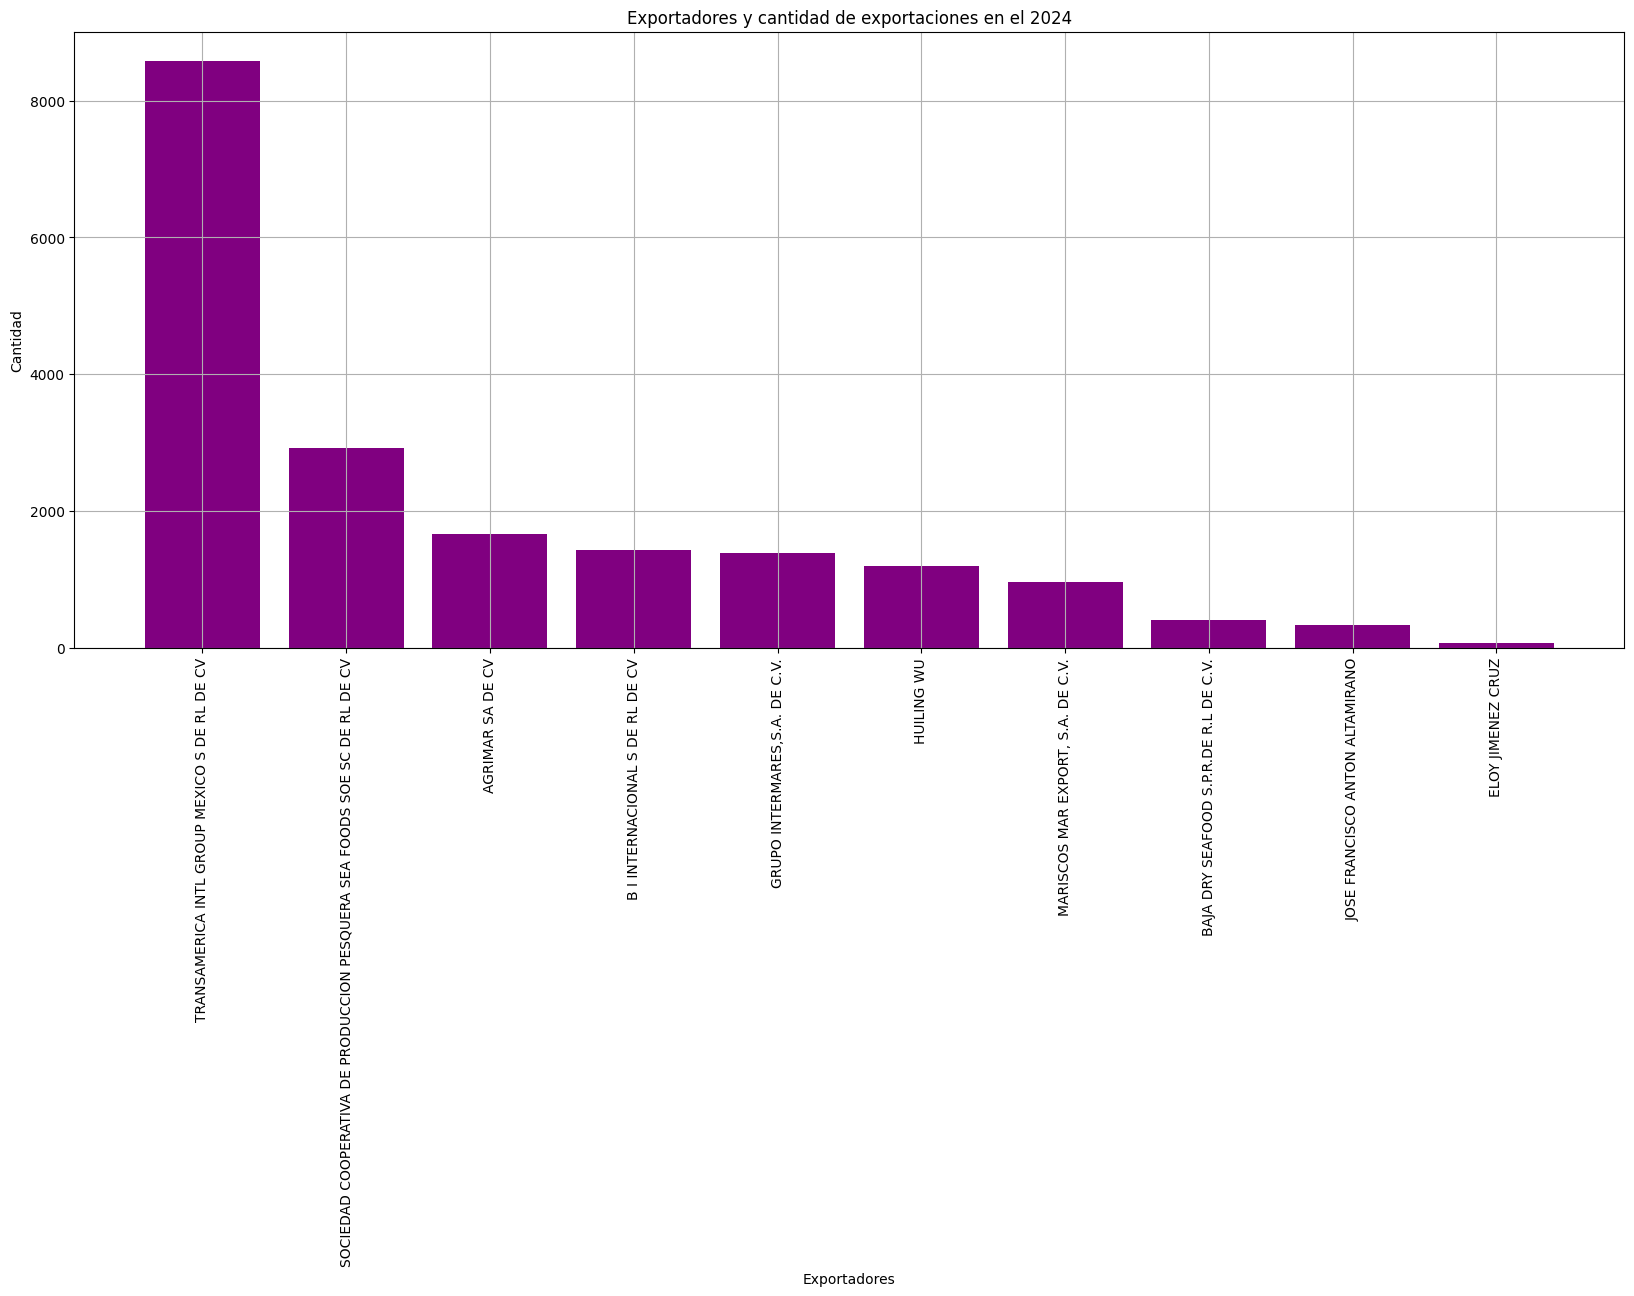

In [11]:
filtered_df_2024 = df.loc[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2024-12-31')]
print(filtered_df_2024.shape)

exportadores_2024 = filtered_df_2024.groupby('Exportador')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(exportadores_2024)

plt.figure(figsize = (20,8))

plt.bar(exportadores_2024['Exportador'], exportadores_2024['Qty 1'], color='purple')
plt.xlabel("Exportadores")
plt.ylabel("Cantidad")
plt.title("Exportadores y cantidad de exportaciones en el 2024")
plt.xticks(rotation=90)

plt.grid()
plt.show()

Year  Exportador                                                              
2019  AAA MARINE SA DE CV                                                           769.00
      AGRIMAR SA DE CV                                                             1975.00
      ALFONSO AARON PRECIADO PEREZ                                                 1910.00
      AVANCES TECNOLOGICOS EN FERTILIDAD S.A. DE C.V.                             15800.00
      CONGELADORA PUERTO PROGRESO S.A. DE C.V.                                      300.00
                                                                                    ...   
2024  HUILING WU                                                                   1200.00
      JOSE FRANCISCO ANTON ALTAMIRANO                                               331.55
      MARISCOS MAR EXPORT, S.A. DE C.V.                                             958.00
      SOCIEDAD COOPERATIVA DE PRODUCCION PESQUERA SEA FOODS SOE SC DE RL DE CV     2925.00
      TRANS

<Axes: xlabel='Year,Exportador'>

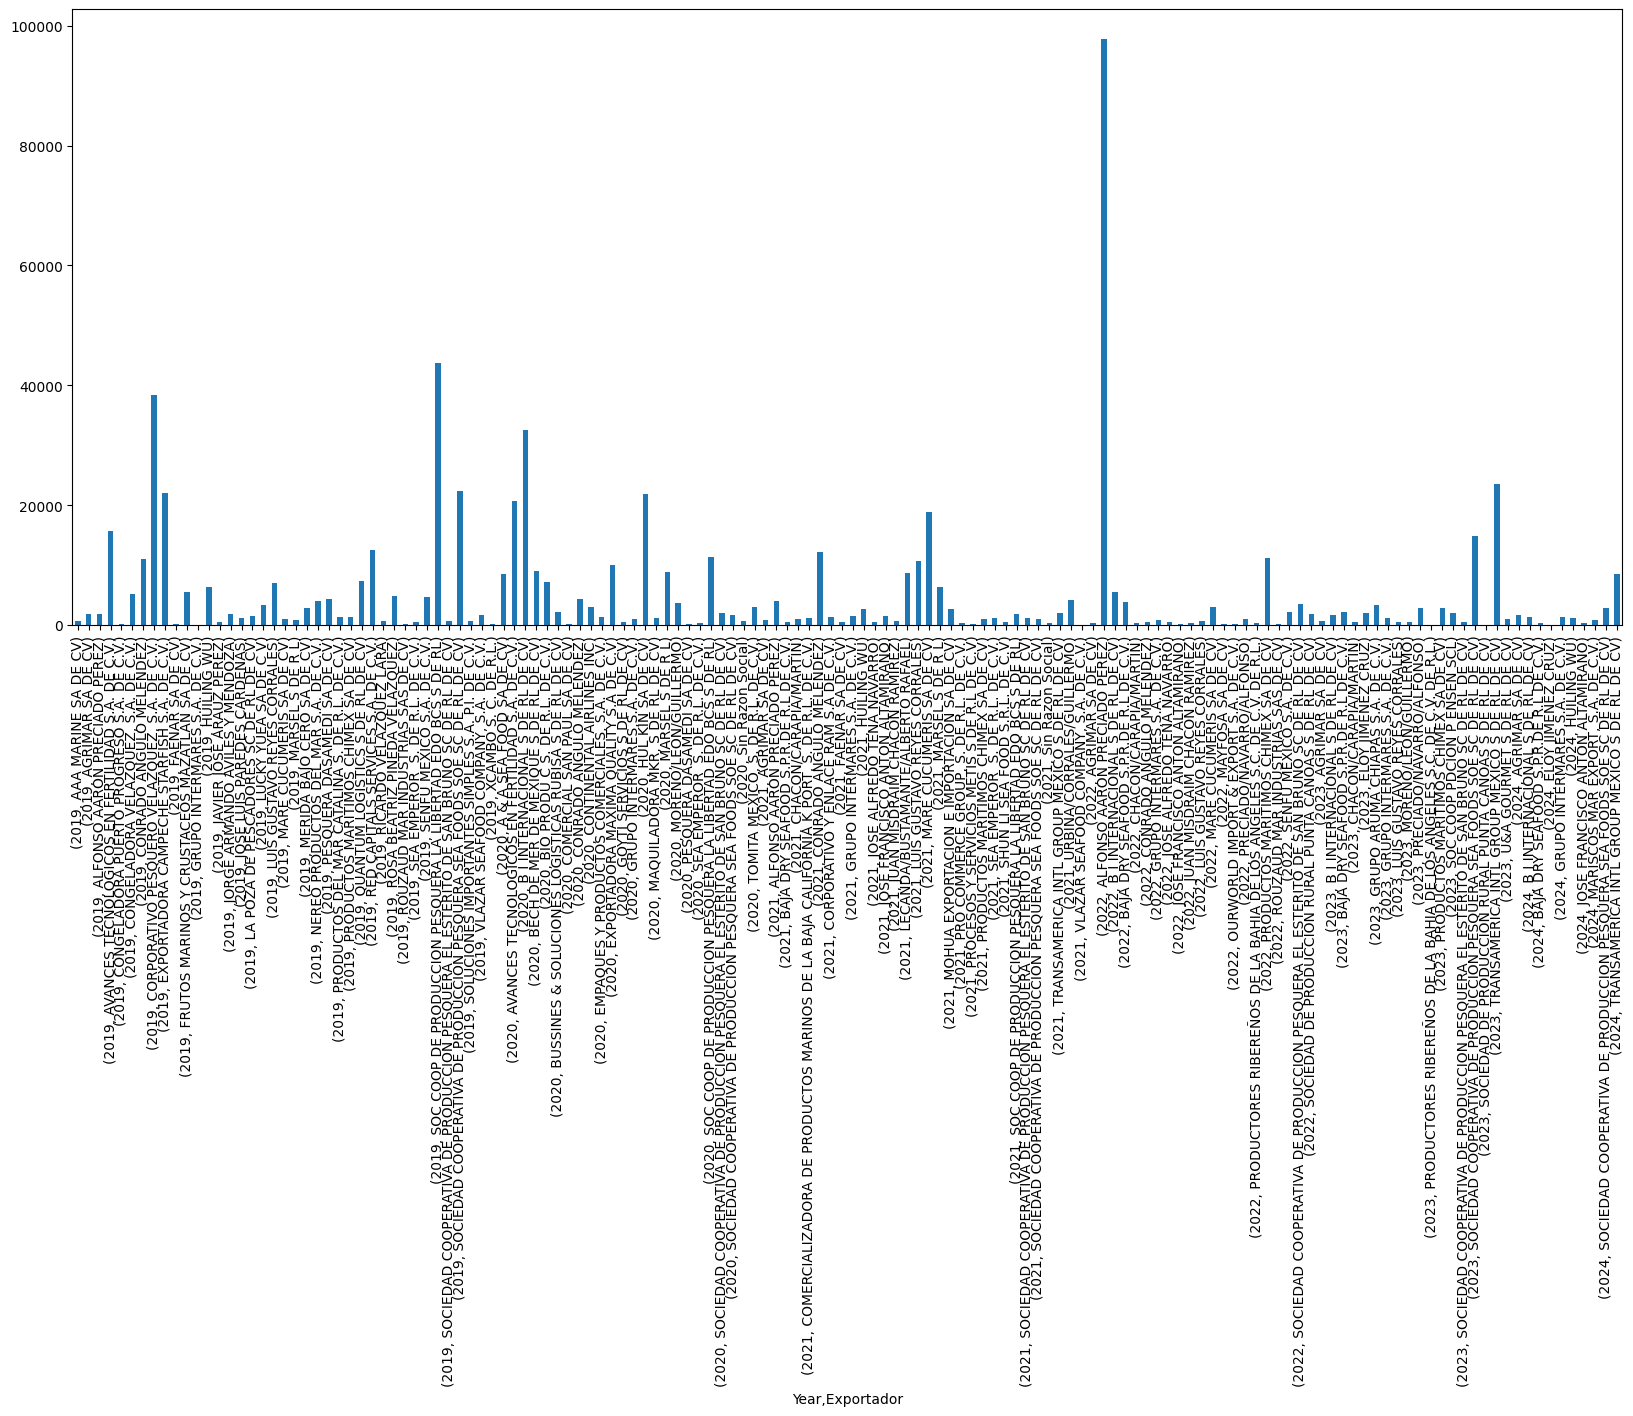

In [12]:
pais_por_anio = df.groupby(['Year','Exportador'])['Qty 1'].sum()
print(pais_por_anio)

fig = plt.figure(figsize = (20,8))
pais_por_anio.plot(kind="bar")

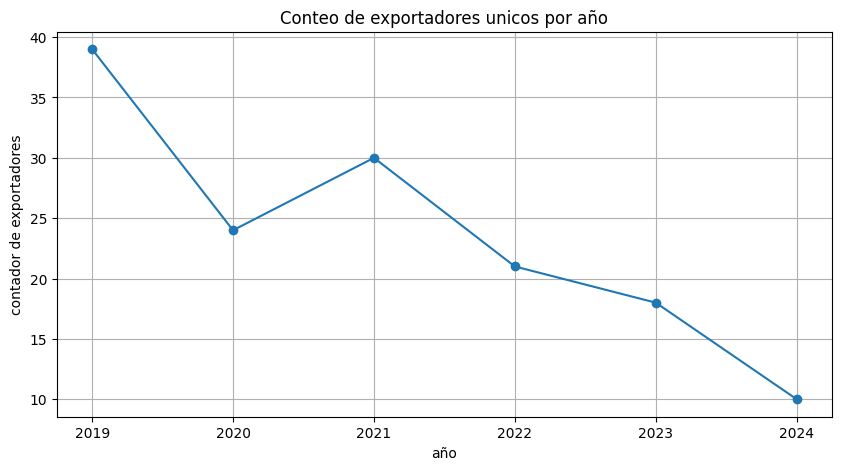

In [13]:
exporters_per_year = df.groupby('Year')['Exportador'].nunique()

plt.figure(figsize=(10, 5))
exporters_per_year.plot(marker='o')
plt.title("Conteo de exportadores unicos por año")
plt.xlabel("año")
plt.ylabel("contador de exportadores")
plt.grid(True)
plt.show()

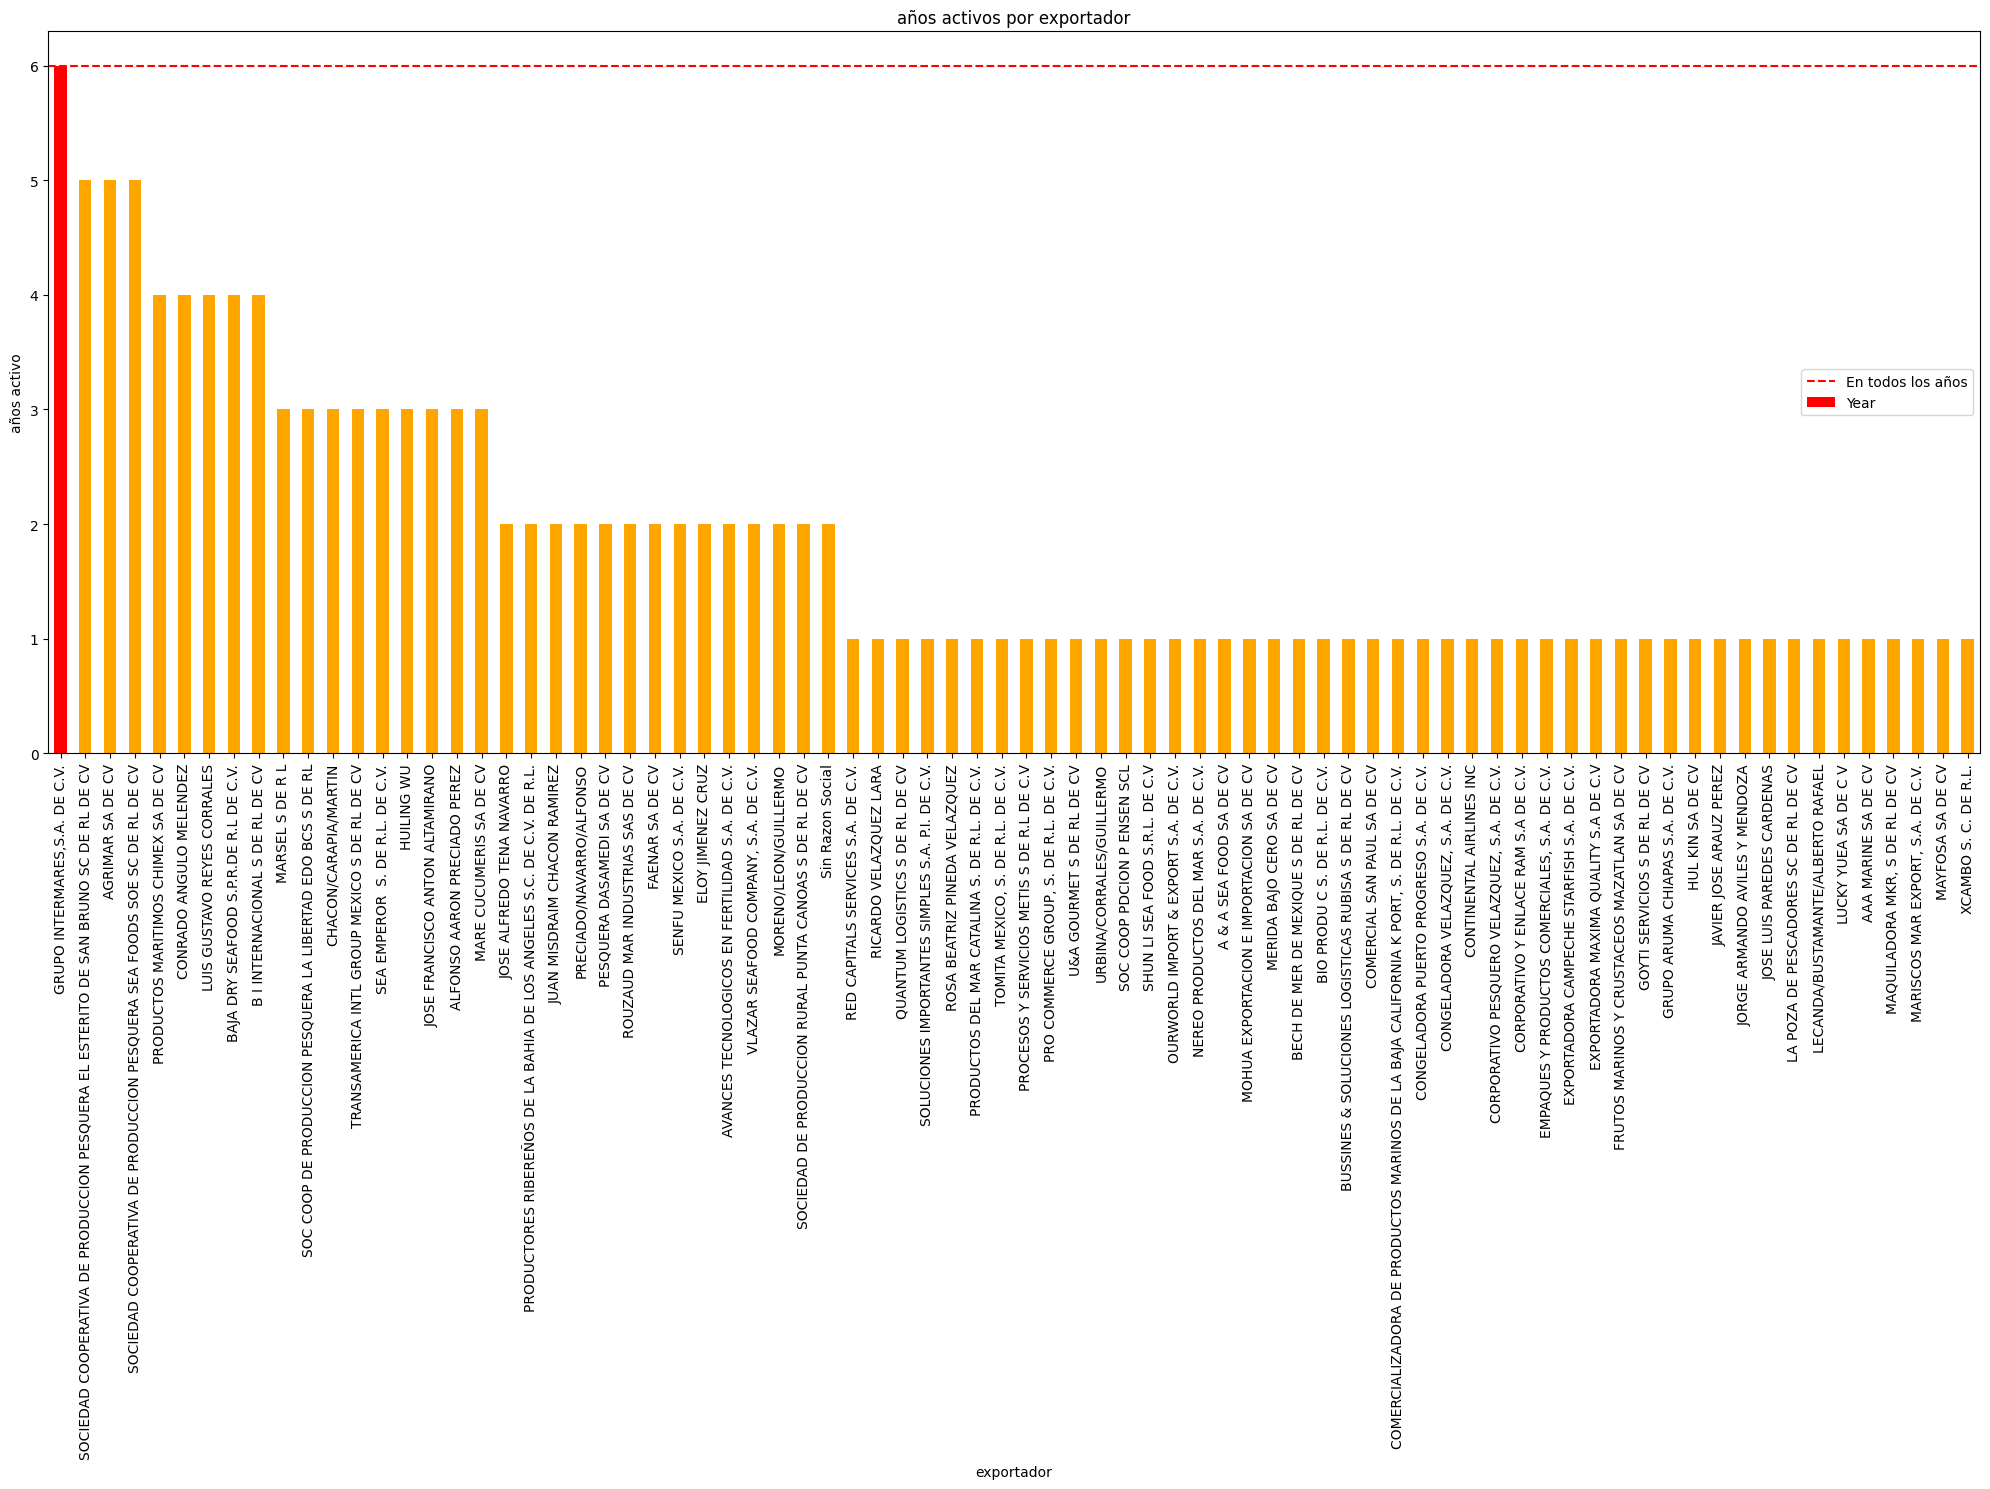

In [14]:
# Get unique years and exporters
all_years = sorted(df['Year'].unique())
all_exporters = df['Exportador'].unique()

# Count years per exporter
exporters_year_counts = df.groupby('Exportador')['Year'].nunique().sort_values(ascending=False)

# Highlight exporters in ALL years
colors = [
    'red' if count == len(all_years) else 'orange' 
    for count in exporters_year_counts
]

# Plot
plt.figure(figsize = (20,15))
exporters_year_counts.plot(kind='bar', color=colors)
plt.axhline(y=len(all_years), color='red', linestyle='--', label=f'En todos los años')
plt.title("años activos por exportador")
plt.xlabel("exportador")
plt.ylabel("años activo")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

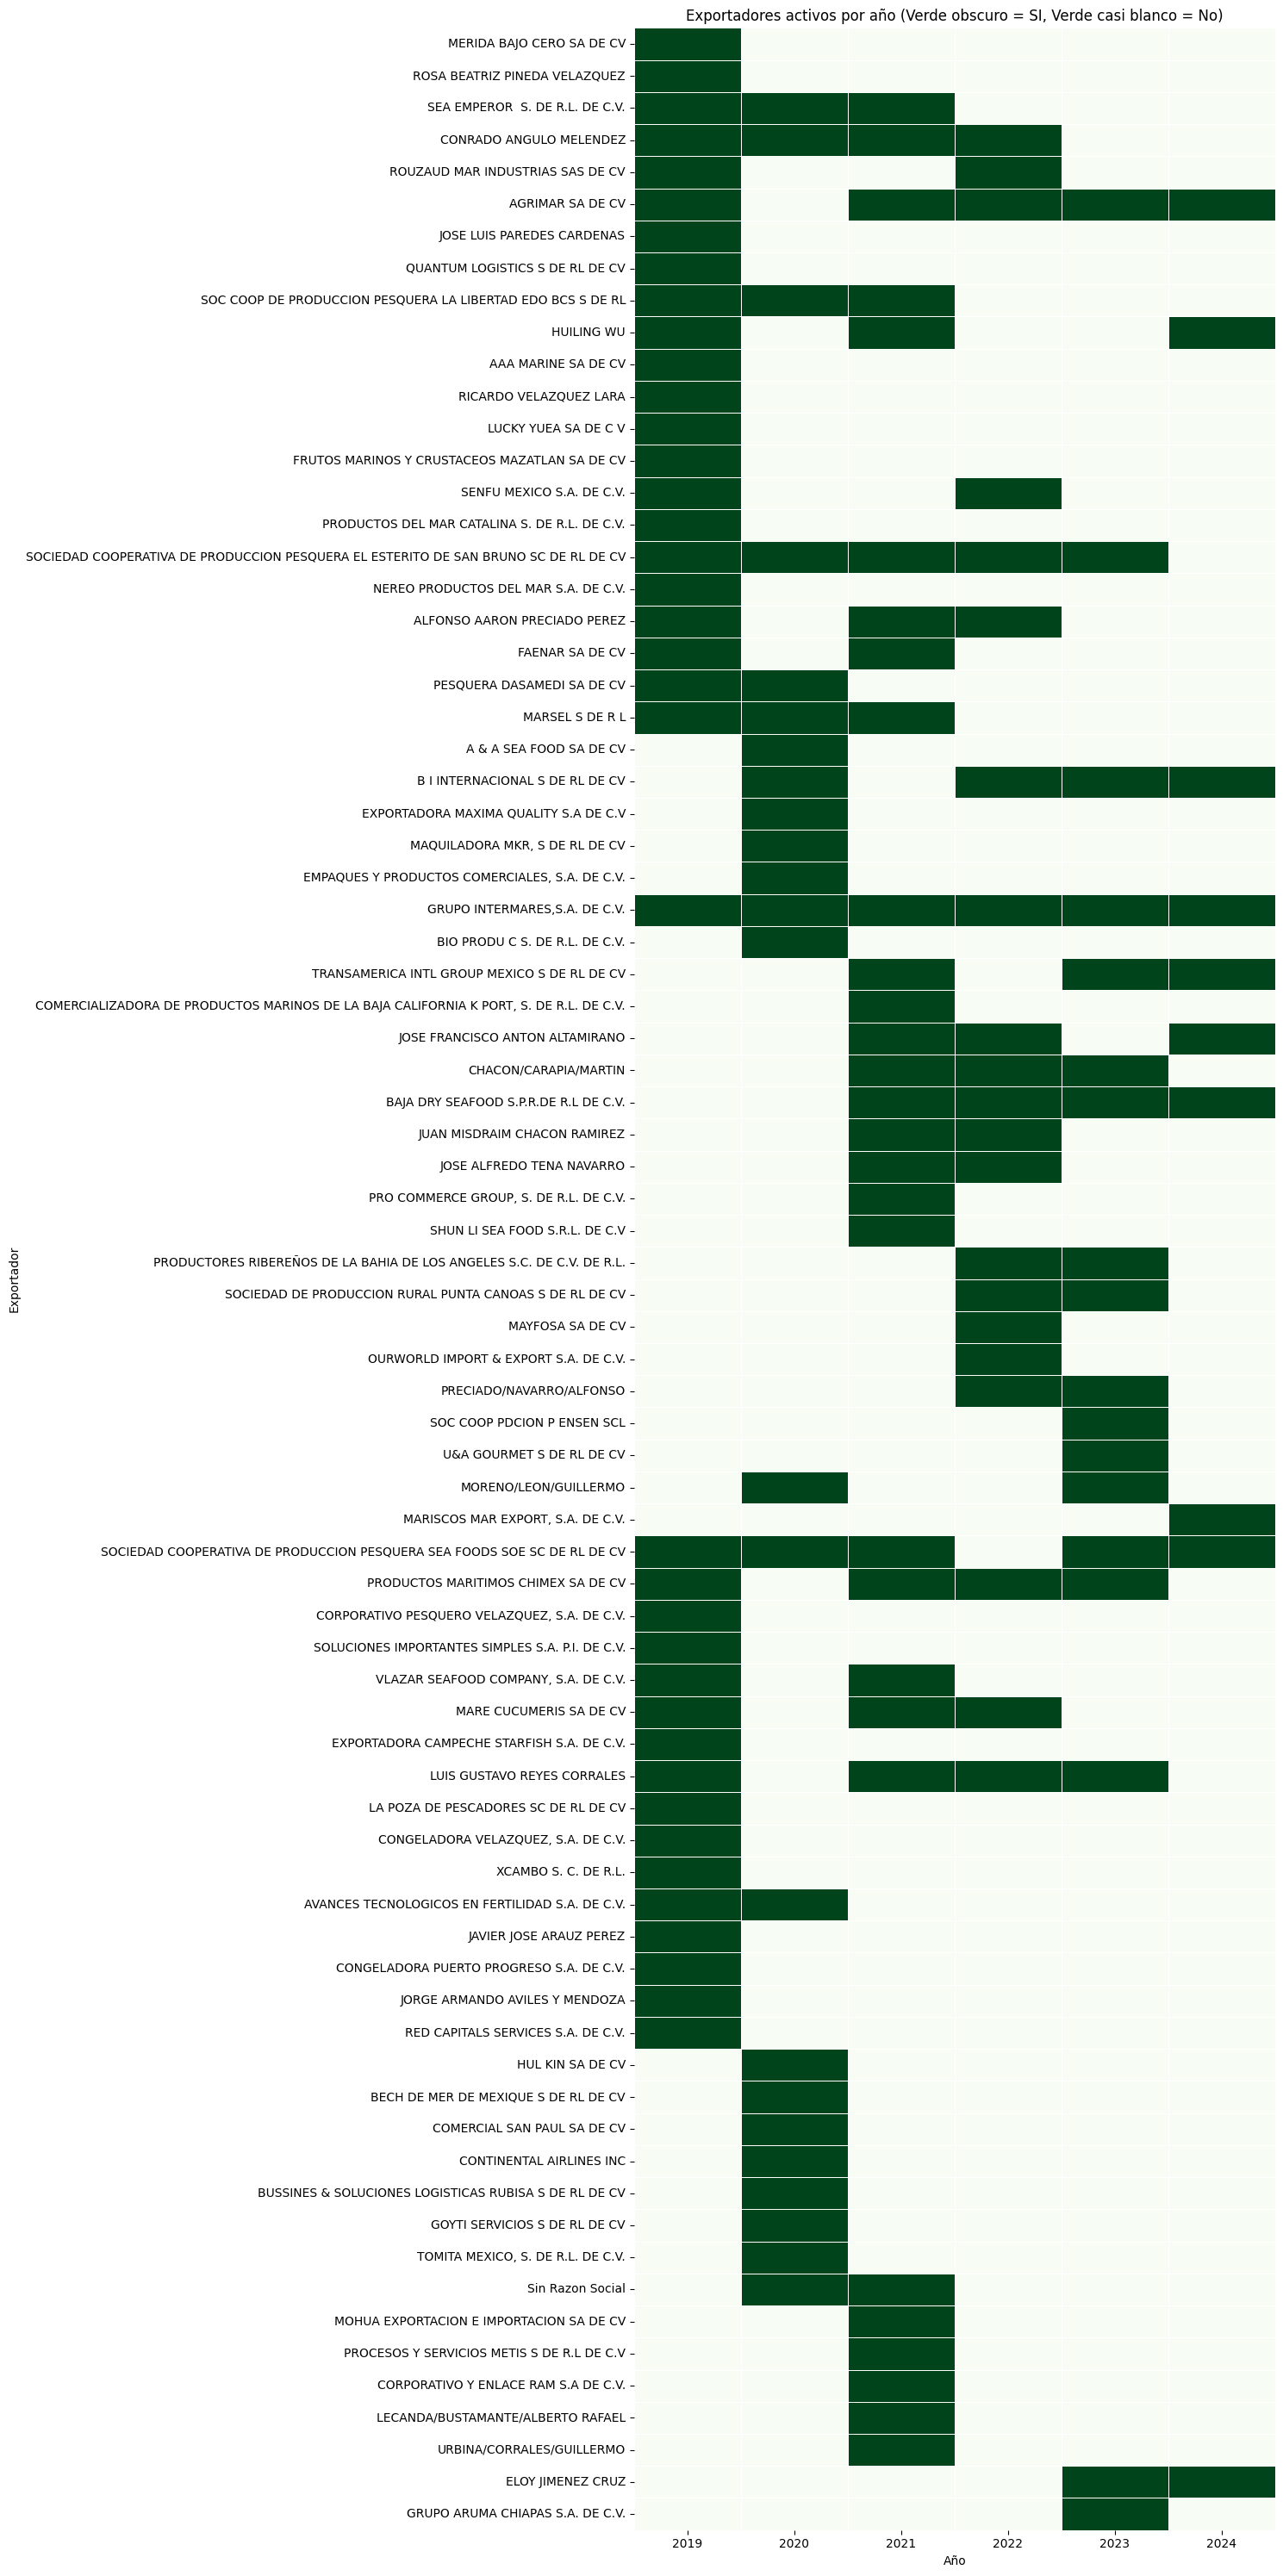

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Fecha' is datetime and extract year
df['Year'] = pd.to_datetime(df['Fecha'], dayfirst=True).dt.year

# Get unique years and exporters
all_years = df['Year'].unique()
# print(all_years)
all_exporters = df['Exportador'].unique()
# print(all_exporters)

# Create a presence matrix (1 if exporter was active in a year, else 0)
presence_matrix = pd.DataFrame(0, index=all_exporters, columns=all_years)

for exporter in all_exporters:
    years_active = df[df['Exportador'] == exporter]['Year'].unique()
    presence_matrix.loc[exporter, years_active] = 1

# print(presence_matrix)

# Plot the heatmap
plt.figure(figsize=(15, 30))
sns.heatmap(
    presence_matrix,
    cmap="Greens",
    cbar=False,
    linewidths=0.5,
)
plt.title("Exportadores activos por año (Verde obscuro = SI, Verde casi blanco = No)")
plt.xlabel("Año")
plt.ylabel("Exportador")
plt.tight_layout()
plt.show()